In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
big_months = [1, 3, 5, 7, 8, 10, 12]
small_months = [4, 6, 9, 11]
Feb = 2

big_month_weeks = 31 / 7
small_month_weeks = 30 / 7
Feb_weeks = 28 / 7

weeks_in_months = [big_month_weeks if i in big_months else small_month_weeks if i in small_months else Feb_weeks for i in range(1, 13)]
print(weeks_in_months)

[4.428571428571429, 4.0, 4.428571428571429, 4.285714285714286, 4.428571428571429, 4.285714285714286, 4.428571428571429, 4.428571428571429, 4.285714285714286, 4.428571428571429, 4.285714285714286, 4.428571428571429]


In [19]:
average_working_hours_per_week_in_months_2022 = [47.9, 47.7, 47.9, 47.8, 48.0, 48.0, 47.7, 47.2, 46.2, 47.3, 46.7, 47.5]
average_working_hours_per_week_in_months_2023 = [49.0, 48.9, 48.7, 48.8, 48.7, 48.7, 48.7, 48.6, 48.8, 48.7, 47.9, 47.9]
annual_working_hours_2022 = sum([weeks_in_months[i] * average_working_hours_per_week_in_months_2022[i] for i in range(12)])
annual_working_hours_2023 = sum([weeks_in_months[i] * average_working_hours_per_week_in_months_2023[i] for i in range(12)])

print(annual_working_hours_2022)
print(annual_working_hours_2023)

2476.4428571428575
2534.9285714285716


In [20]:
annual_working_hours_2024 = [48.7, 48.6, 48.7, 48.5, 48.6, 48.0, 49.0]

In [21]:
# Months for each year
months_2022_2023 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_2024 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

# Combine the data
years = ['2022'] * 12 + ['2023'] * 12 + ['2024'] * 7
months = months_2022_2023 * 2 + months_2024
working_hours = average_working_hours_per_week_in_months_2022 + average_working_hours_per_week_in_months_2023 + annual_working_hours_2024

# Creating a DataFrame
data = {
    'Month-Year': [f'{month}-{year}' for month, year in zip(months, years)],
    'Working Hours': working_hours
}
df = pd.DataFrame(data)

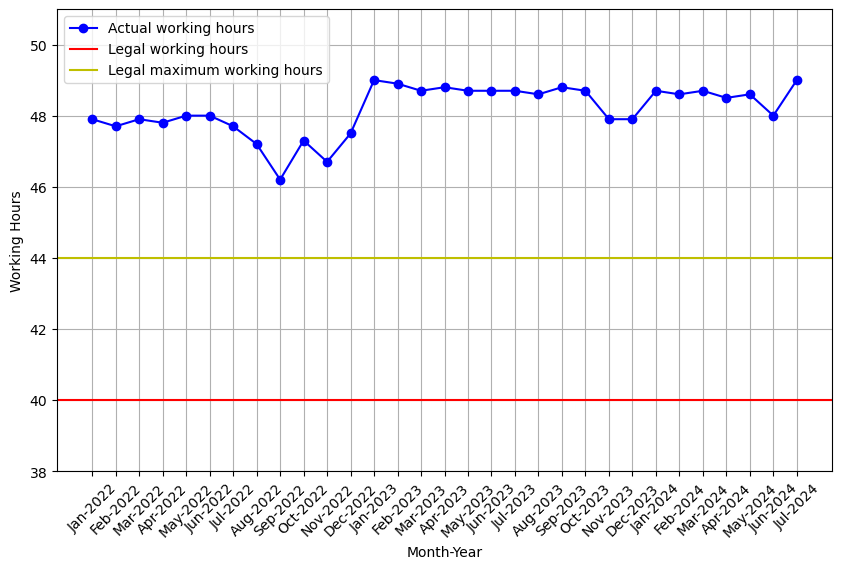

In [36]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Month-Year'], df['Working Hours'], marker='o', linestyle='-', color='b')

# Adding title and labels
# plt.title('Average Working Hours per Week in China (2022-2024) ')
plt.xlabel('Month-Year')
plt.ylabel('Working Hours')

# Setting y-axis range starting from 40
plt.ylim(38, 51)  # Start from 40 and end slightly above the max value

# Adding a horizontal line at 40
plt.axhline(y=40, color='r', linestyle='-', linewidth=1.5)

# Adding a horizontal line at 44
plt.axhline(y=44, color='y', linestyle='-', linewidth=1.5)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(['Actual working hours', 'Legal working hours', 'Legal maximum working hours'], loc='upper left')

# Display the plot
plt.grid(True)
plt.show()

## Inverted U-curve

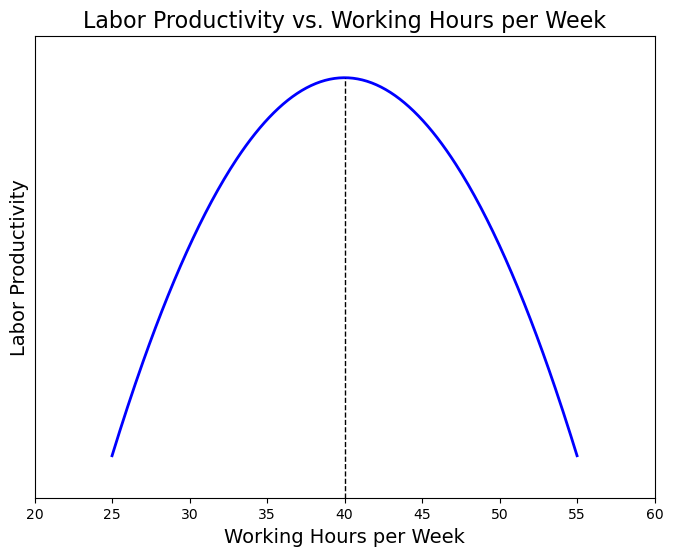

In [17]:
# Generate x values (working hours per week)
x = np.linspace(25, 55, 300)

# Define a function for the inverted U-curve (labor productivity)
# The function peaks at x = 40.
a = -0.2  # Controls the curvature
b = 1.6    # Controls the height of the peak
c = -a * 40**2 + b * 40  # Adjusts the curve to peak at the y-axis when x = 40

y = a * (x - 40)**2 + c

# Calculate the y-value at x = 40
y_peak = a * (40 - 40)**2 + c  # This simplifies to y_peak = c

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linewidth=2)

# Set the labels for the axes
plt.xlabel('Working Hours per Week', fontsize=14)
plt.ylabel('Labor Productivity', fontsize=14)

# Hide y-axis ticks and labels
plt.yticks([])

# Add a vertical dotted line at x = 40, reaching up to y_peak
plt.plot([40, 40], [0, y_peak], color='black', linestyle='--', linewidth=1)

# Set the range for the axes
plt.xlim(20, 60)
plt.ylim(min(y) - 5, max(y) + 5)  # Aesthetic y-axis range

# Set a title for the plot
plt.title('Labor Productivity vs. Working Hours per Week', fontsize=16)

# Display the plot
plt.show()